In [ ]:
                                                                 # KNN #
#Implement a KNN model to classify the animals in to categorie

#used dataset 'zoo'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Zoo.csv')

In [ ]:
# Print the column names to identify the target variable
print("Column Names:", df.columns)

Column Names: Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


In [ ]:
# Separate features (X) and target variable (y)
target_column = 'type'  # Replace with the actual target column name
X = df.drop(['animal name', target_column], axis=1)  # Exclude 'animal name' and target column from features
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = df[target_column]

In [ ]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# K-Fold Cross Validation
k_fold_value = 5  # You can adjust the number of folds as needed

In [ ]:
# Initialize a Random Forest classifier to obtain feature importances
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Select two features with the highest importances
top_features_indices = np.argsort(rf_classifier.feature_importances_)[::-1][:2]
feature1, feature2 = X.columns[top_features_indices]

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # You can adjust the values to search
grid_search = GridSearchCV(knn_classifier, param_grid, cv=k_fold_value)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [ ]:
# Get the optimal value of k from the grid search
optimal_k = grid_search.best_params_['n_neighbors']
print(f'Optimal value of k: {optimal_k}')

Optimal value of k: 3


In [ ]:
# Train the model with the optimal k
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_output)

Accuracy: 0.9523809523809523
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



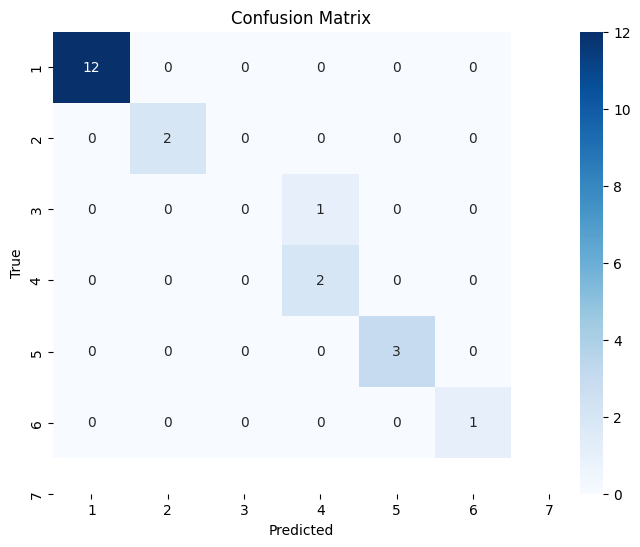

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

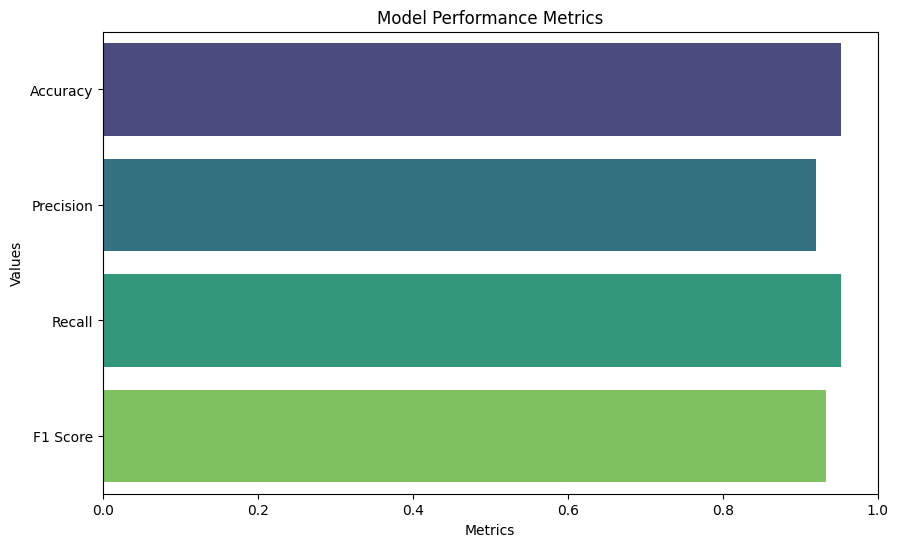

In [ ]:
# Visualization of Model Performance Metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=metrics, palette='viridis')
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()